In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
main_df = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [3]:
copy_df = main_df.copy()

In [4]:
copy_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
# Our dataset has 64374 entries and 12 features
copy_df.shape

(64374, 12)

In [6]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
copy_df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

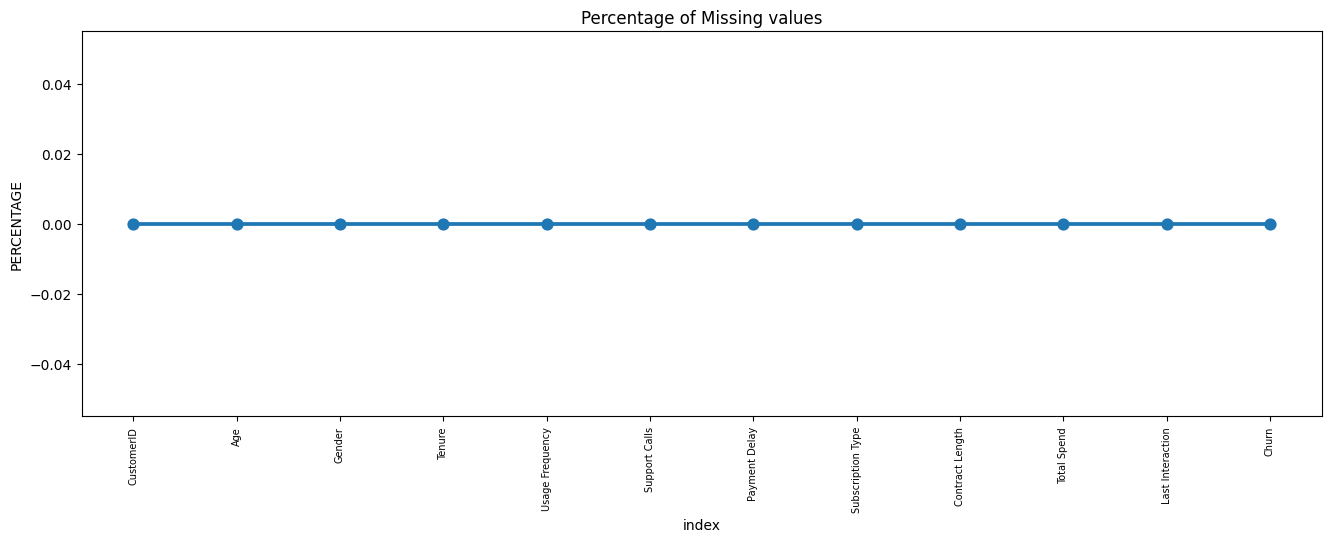

In [8]:
missing = pd.DataFrame((copy_df.isnull().sum())*100/copy_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(data = missing, x="index", y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Tenure'),
  Text(2, 0, 'Usage Frequency'),
  Text(3, 0, 'Support Calls'),
  Text(4, 0, 'Payment Delay'),
  Text(5, 0, 'Total Spend'),
  Text(6, 0, 'Last Interaction'),
  Text(7, 0, 'Churn')])

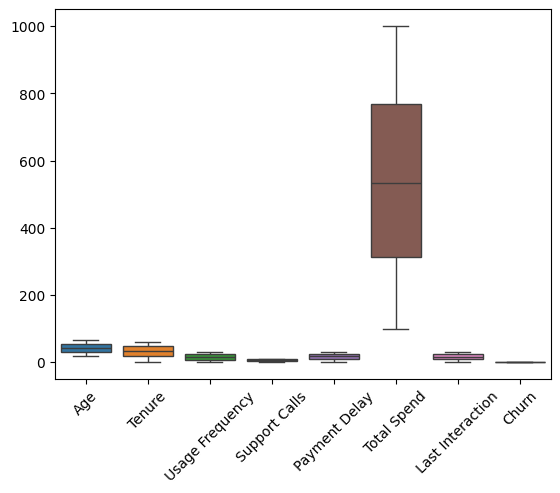

In [9]:
# Outlier Detection
outlier_df = copy_df.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
sns.boxplot(data=outlier_df)
plt.xticks(rotation=45)

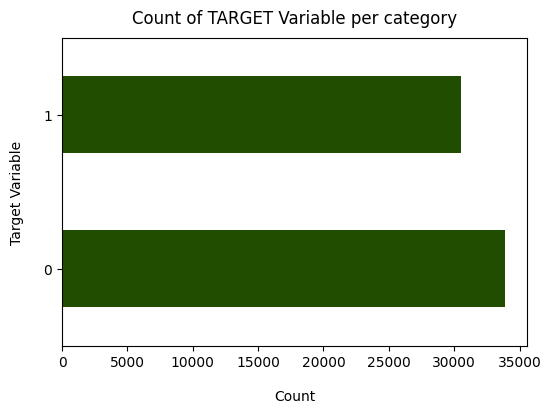

In [10]:
copy_df['Churn'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [11]:
copy_df['Churn'].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

In [12]:
100*copy_df['Churn'].value_counts()/len(copy_df['Churn'])

Churn
0    52.631497
1    47.368503
Name: count, dtype: float64

In [13]:
for column in copy_df.columns:
    print(f'{column} =>', copy_df[column].value_counts().shape)

CustomerID => (64374,)
Age => (48,)
Gender => (2,)
Tenure => (60,)
Usage Frequency => (30,)
Support Calls => (11,)
Payment Delay => (31,)
Subscription Type => (3,)
Contract Length => (3,)
Total Spend => (901,)
Last Interaction => (30,)
Churn => (2,)


In [14]:
max_val = copy_df['Tenure'].max()
min_val = copy_df['Tenure'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['tenure_group'] = pd.cut(copy_df.Tenure, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['tenure_group'].value_counts()

tenure_group
49 - 60    13995
37 - 48    13968
25 - 36    13764
1 - 12     11360
13 - 24    11287
Name: count, dtype: int64

In [15]:
copy_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,25 - 36
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,25 - 36
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,25 - 36
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1 - 12
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,49 - 60


In [16]:
copy_df.drop(['CustomerID', 'Tenure'], axis=1, inplace=True)

In [17]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group
0,22,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36
1,41,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36
2,47,Male,10,2,29,Premium,Annual,757,21,0,25 - 36
3,35,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12
4,53,Female,24,9,2,Standard,Annual,533,18,0,49 - 60


In [18]:
copy_df.describe()

,Age,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,13.924911,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,18.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,42.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,54.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,65.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [19]:
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]

<Axes: xlabel='Age', ylabel='count'>

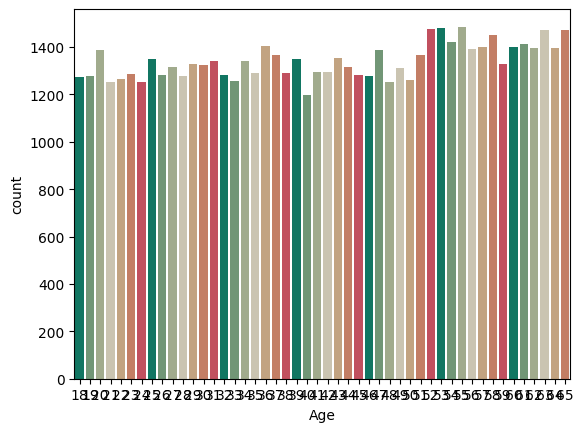

In [20]:
sns.countplot(data=copy_df, x="Age", palette=color)

In [21]:
max_val = copy_df['Age'].max()
min_val = copy_df['Age'].min()
labels = ["{0} - {1}".format(i, i + 11) for i in range(min_val, max_val, 12)]
copy_df['Age_group'] = pd.cut(copy_df.Age, range(min_val, max_val+10, 12), right=False, labels=labels)
copy_df['Age_group'].value_counts()

Age_group
54 - 65    17035
42 - 53    16054
30 - 41    15738
18 - 29    15547
Name: count, dtype: int64

In [22]:
copy_df.head()

,Age,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,22,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36,18 - 29
1,41,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36,30 - 41
2,47,Male,10,2,29,Premium,Annual,757,21,0,25 - 36,42 - 53
3,35,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12,30 - 41
4,53,Female,24,9,2,Standard,Annual,533,18,0,49 - 60,42 - 53


In [23]:
copy_df.drop("Age", axis=1, inplace=True)

In [24]:
copy_df.head()

,Gender,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,tenure_group,Age_group
0,Female,14,4,27,Basic,Monthly,598,9,1,25 - 36,18 - 29
1,Female,28,7,13,Standard,Monthly,584,20,0,25 - 36,30 - 41
2,Male,10,2,29,Premium,Annual,757,21,0,25 - 36,42 - 53
3,Male,12,5,17,Premium,Quarterly,232,18,0,1 - 12,30 - 41
4,Female,24,9,2,Standard,Annual,533,18,0,49 - 60,42 - 53


<Axes: xlabel='Age_group', ylabel='count'>

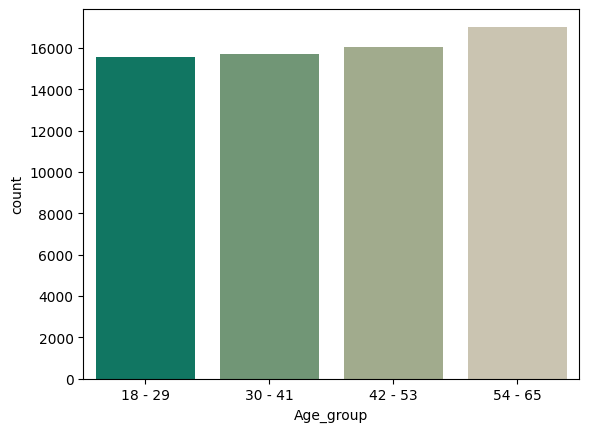

In [25]:
sns.countplot(data=copy_df, x="Age_group", palette=color)

In [26]:
def create_donut(sizes, labels, ax):
    ax.pie(
        sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=color, 
        wedgeprops={'width': 0.4}  # Width controls the donut shape
    )

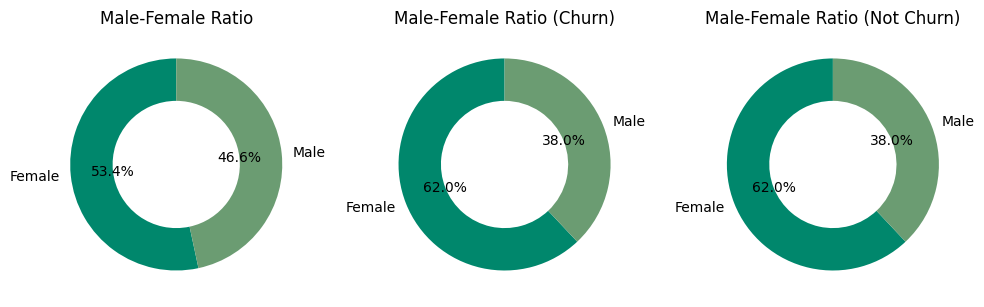

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Gender"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Gender"].value_counts(), copy_df["Gender"].unique(), axes[0])
create_donut(y["Gender"].value_counts(), y["Gender"].unique(), axes[1])
create_donut(y["Gender"].value_counts(), y["Gender"].unique(), axes[2])


# Set titles
axes[0].set_title('Male-Female Ratio')
axes[1].set_title('Male-Female Ratio (Churn)')
axes[2].set_title('Male-Female Ratio (Not Churn)')

# Show the plots
plt.tight_layout()
plt.show()

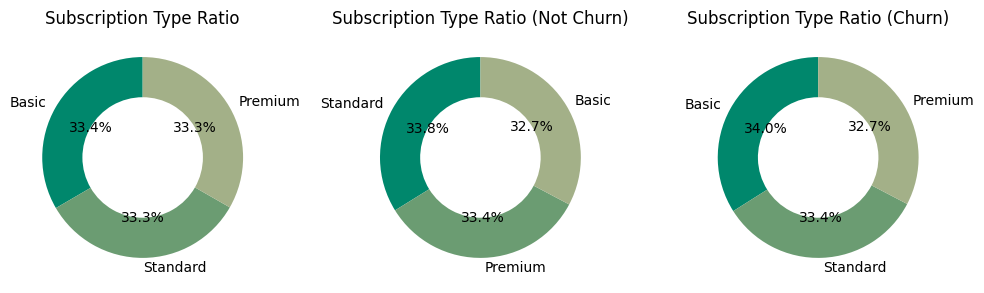

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Subscription Type"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Subscription Type"].value_counts(), copy_df["Subscription Type"].unique(), axes[0])
create_donut(x["Subscription Type"].value_counts(), x["Subscription Type"].unique() , axes[1])
create_donut(y["Subscription Type"].value_counts(), y["Subscription Type"].unique(), axes[2])

# Set titles
axes[0].set_title('Subscription Type Ratio')
axes[1].set_title('Subscription Type Ratio (Not Churn)')
axes[2].set_title('Subscription Type Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

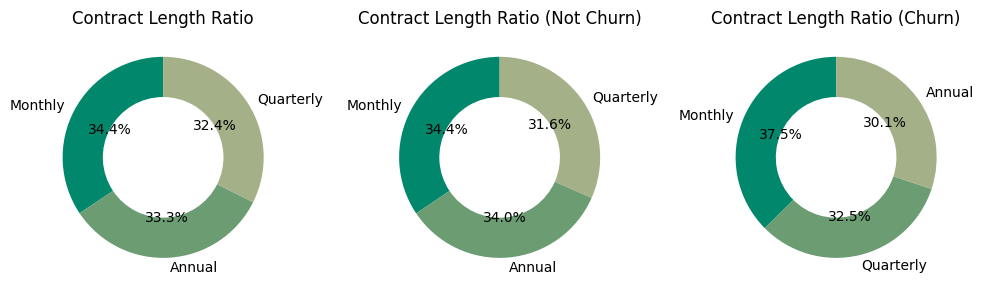

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot each donut chart
x = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 0)])
y = pd.DataFrame(copy_df["Contract Length"][(copy_df["Churn"] == 1)])
create_donut(copy_df["Contract Length"].value_counts(), copy_df["Contract Length"].unique(), axes[0])
create_donut(x["Contract Length"].value_counts(), x["Contract Length"].unique() , axes[1])
create_donut(y["Contract Length"].value_counts(), y["Contract Length"].unique(), axes[2])

# Set titles
axes[0].set_title('Contract Length Ratio')
axes[1].set_title('Contract Length Ratio (Not Churn)')
axes[2].set_title('Contract Length Ratio (Churn)')

# Show the plots
plt.tight_layout()
plt.show()

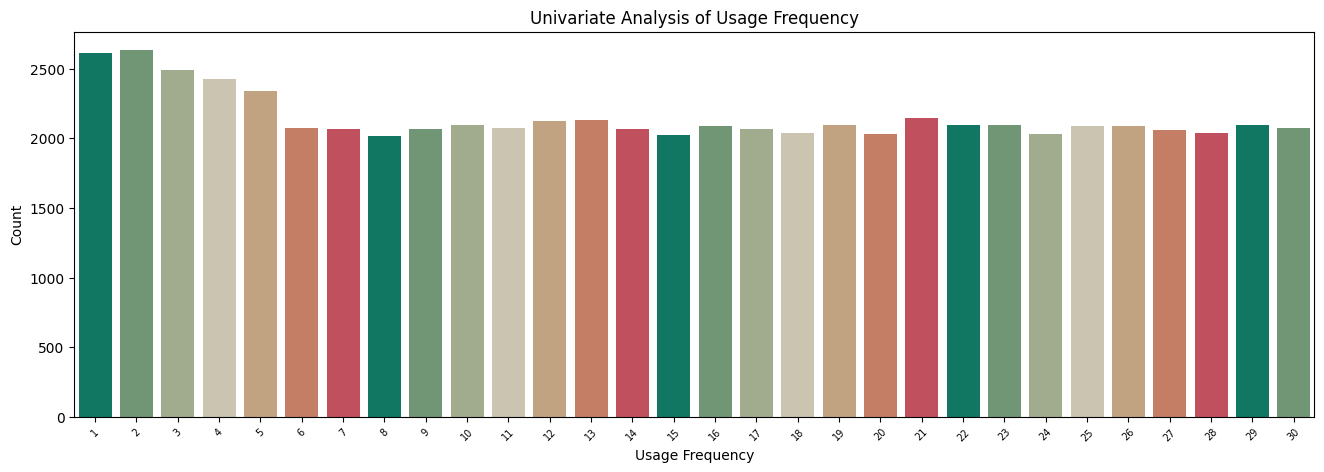

In [30]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

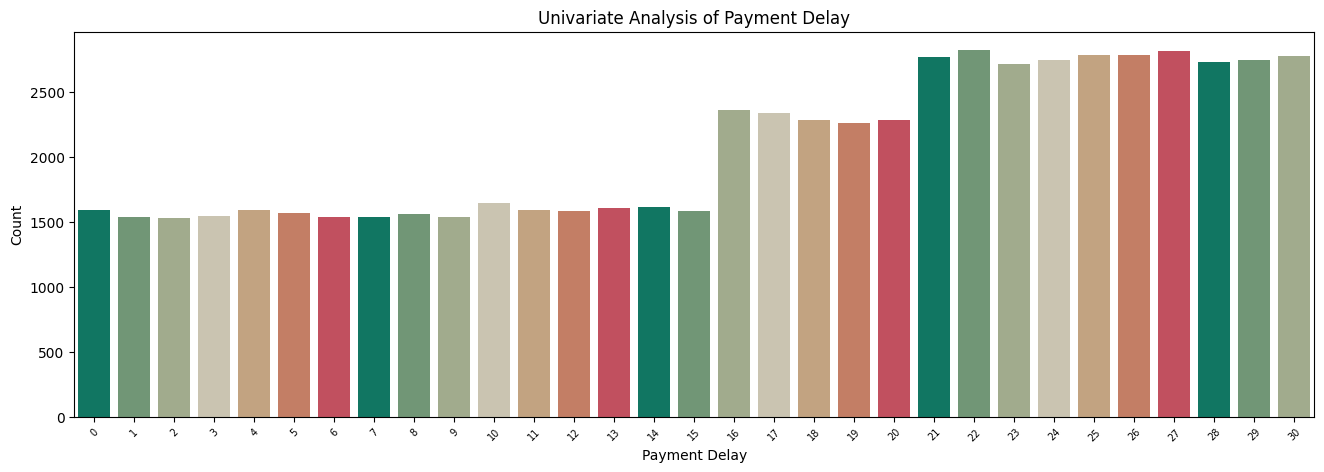

In [31]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Univariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

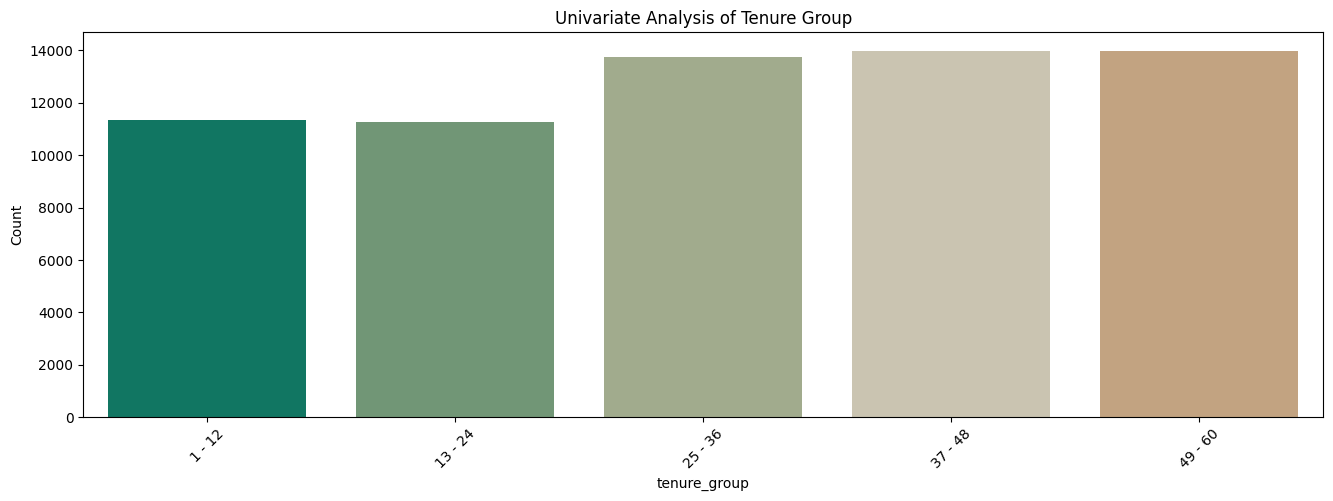

In [32]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="tenure_group", palette=color)
plt.xticks(rotation =45)
plt.title("Univariate Analysis of Tenure Group")
plt.ylabel("Count")
plt.show()

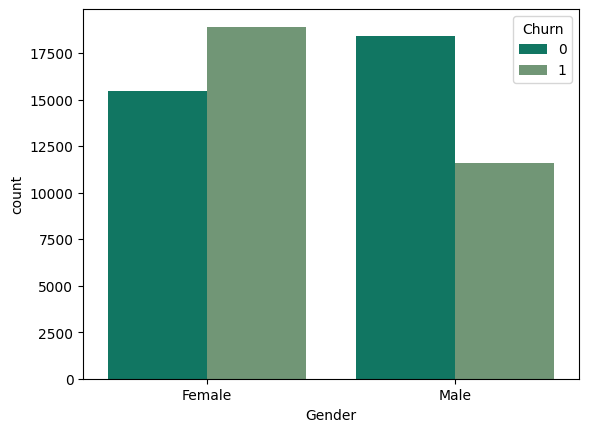

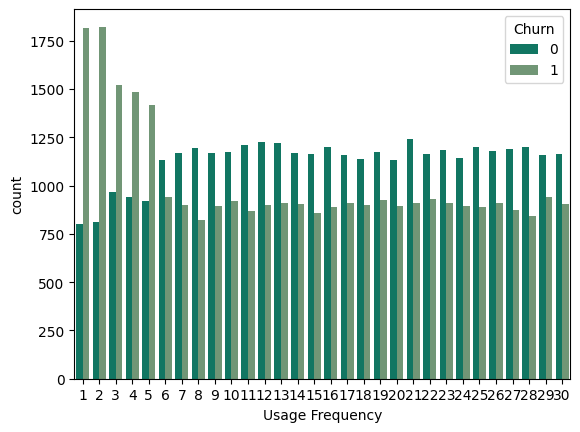

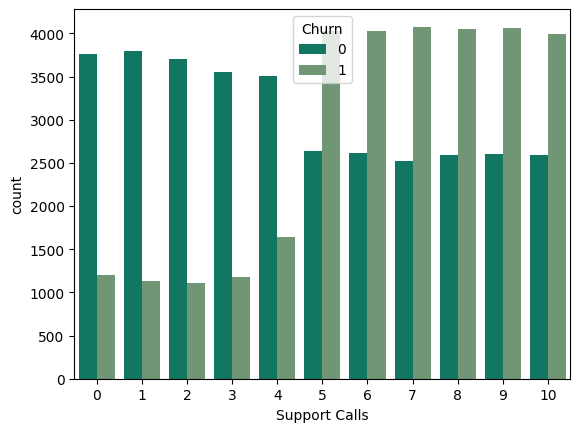

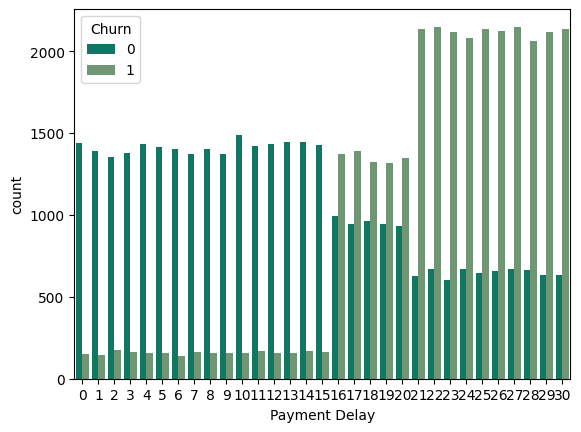

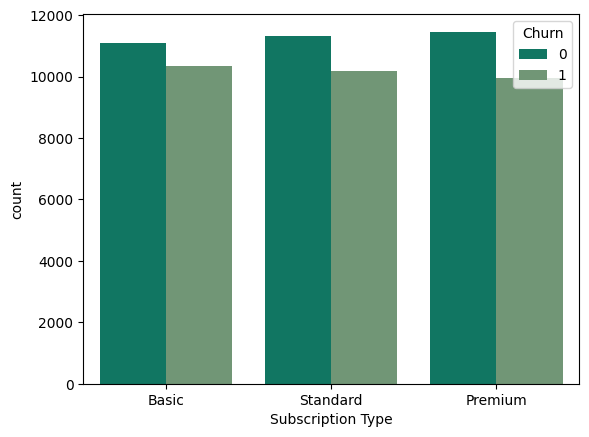

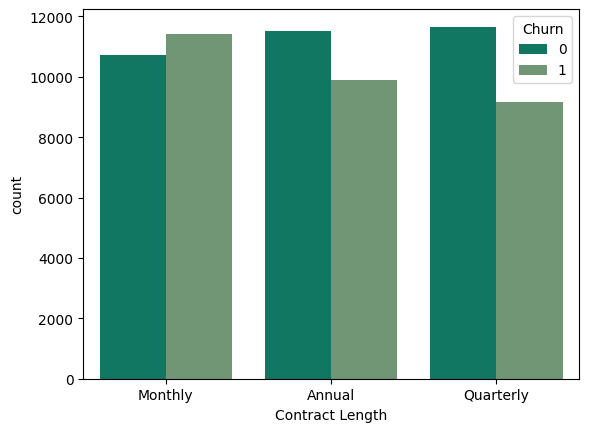

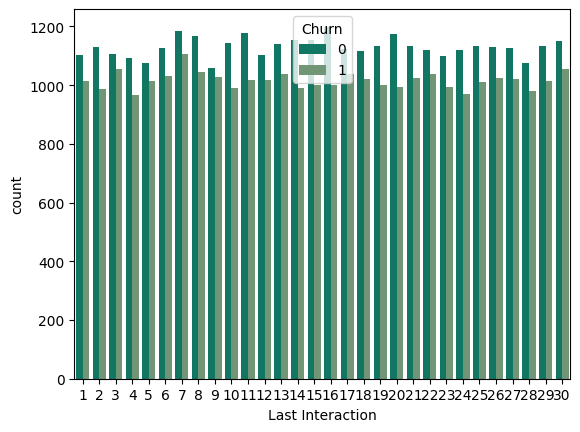

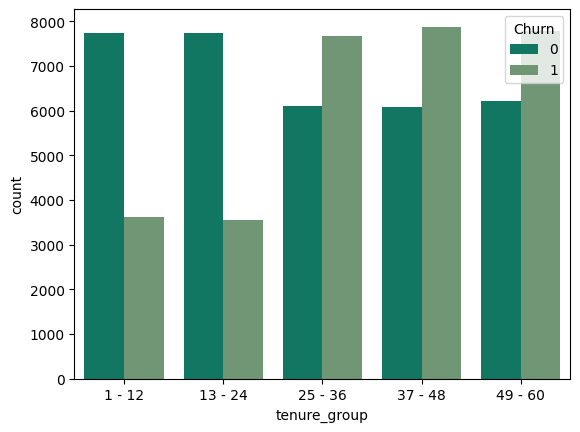

In [33]:
color = ["#00876c", "#6b9c72", "#a3b088", "#cec6ad", "#cda376", "#d37755", "#d43d51"]
for i, predictor in enumerate(copy_df.drop(columns=['Churn', 'Total Spend', 'Age_group'])):
    plt.figure(i)
    sns.countplot(data=copy_df, x=predictor, hue='Churn', palette=color)

Text(0.5, 1.0, 'Total Spend by churn')

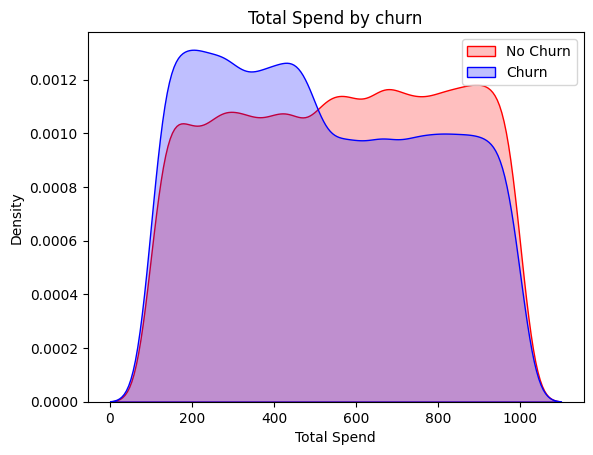

In [34]:
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 0)],
                color="Red", shade = True)
Tot = sns.kdeplot(copy_df["Total Spend"][(copy_df["Churn"] == 1)],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Spend')
Tot.set_title('Total Spend by churn')

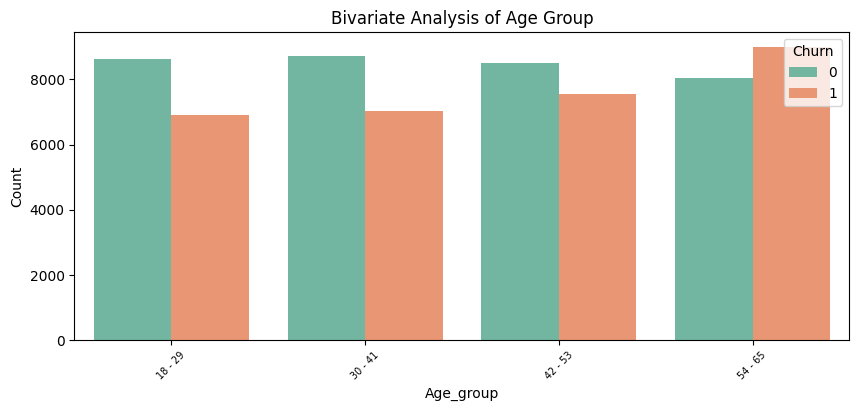

In [35]:
plt.figure(figsize=(10,4))
ax = sns.countplot(data=copy_df, x="Age_group", hue='Churn', palette = "Set2")
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Age Group")
plt.ylabel("Count")
plt.show()

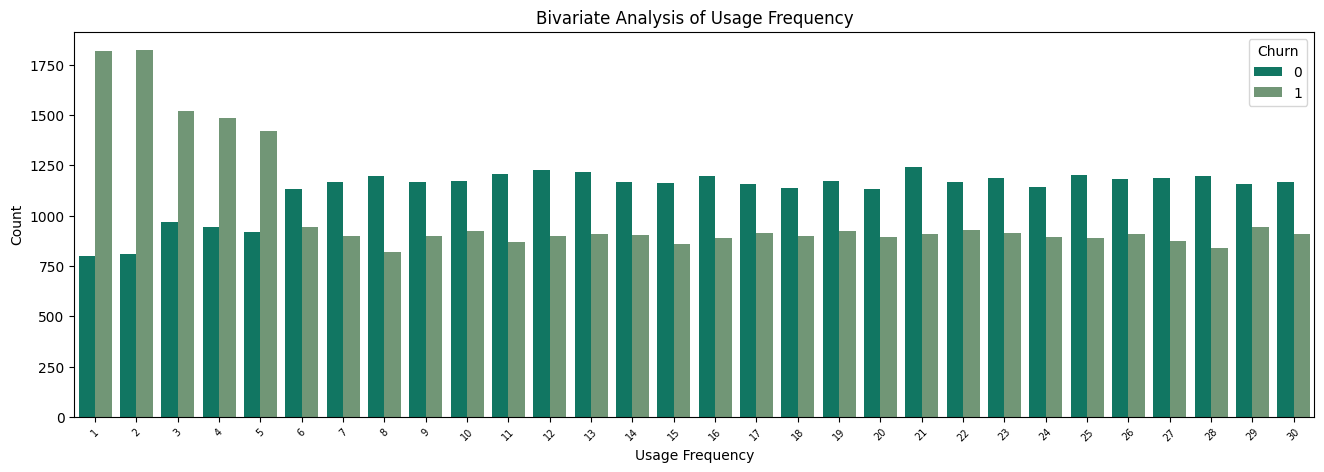

In [36]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Usage Frequency", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Usage Frequency")
plt.ylabel("Count")
plt.show()

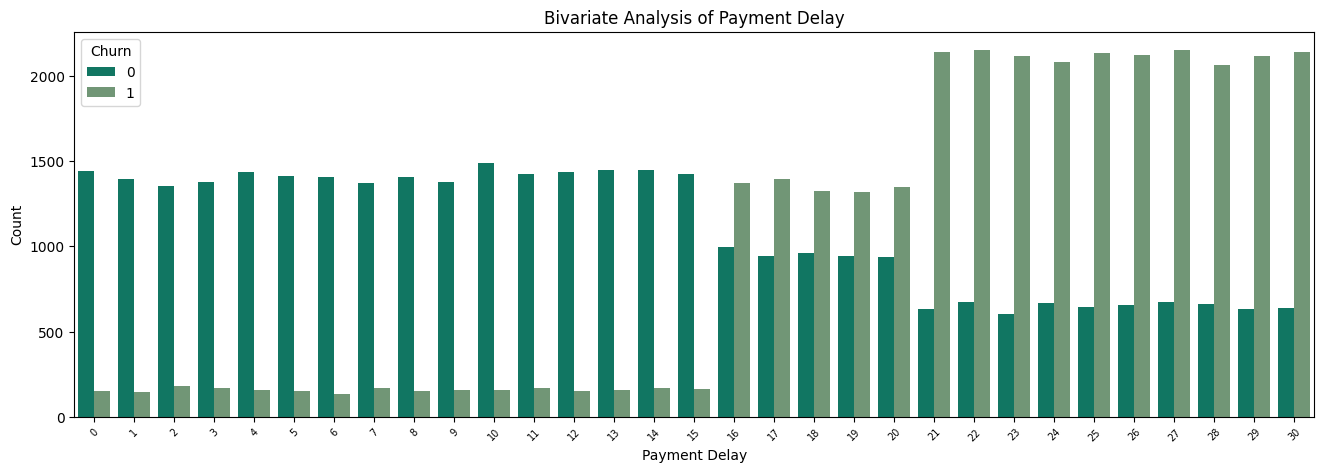

In [37]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data=copy_df, x="Payment Delay", hue='Churn', palette=color)
plt.xticks(rotation =45,fontsize =7)
plt.title("Bivariate Analysis of Payment Delay")
plt.ylabel("Count")
plt.show()

In [38]:
new_df1_target0=copy_df.loc[copy_df["Churn"]==0]
new_df1_target1=copy_df.loc[copy_df["Churn"]==1]

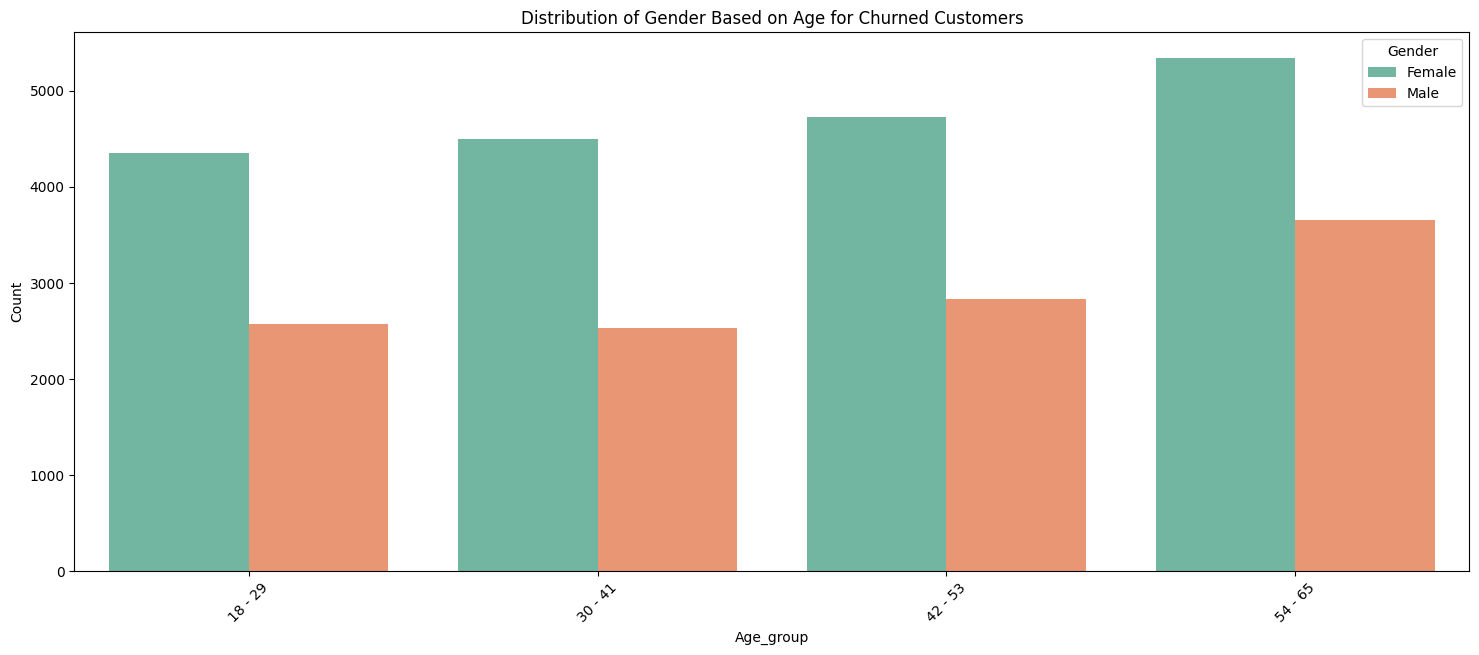

In [39]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target1, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Churned Customers")
plt.ylabel("Count")
plt.show()

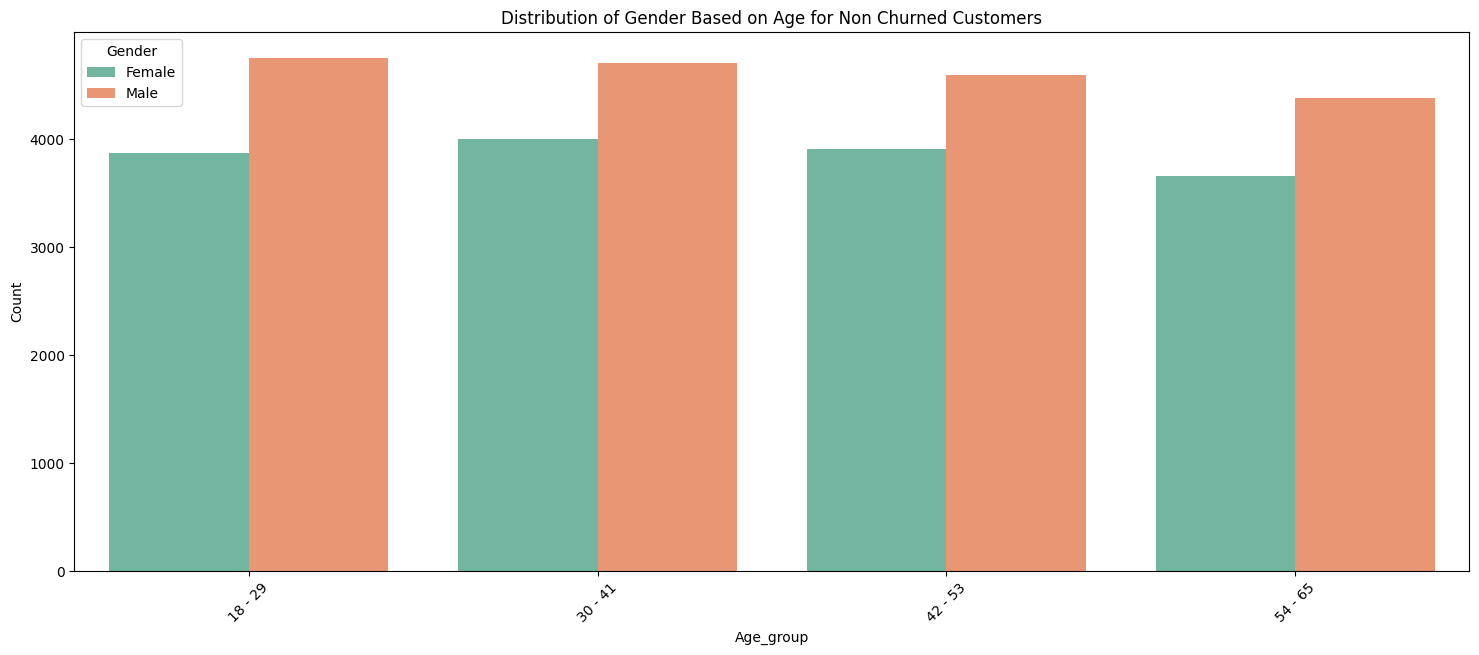

In [40]:
plt.figure(figsize=(18,7))
ax = sns.countplot(data=new_df1_target0, x="Age_group", hue='Gender', palette="Set2")
plt.xticks(rotation =45)
plt.title("Distribution of Gender Based on Age for Non Churned Customers")
plt.ylabel("Count")
plt.show()

In [41]:
copy_df_dummies = pd.get_dummies(copy_df)
copy_df_dummies.head()

,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,...,Contract Length_Quarterly,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,Age_group_18 - 29,Age_group_30 - 41,Age_group_42 - 53,Age_group_54 - 65
0,14,4,27,598,9,1,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,28,7,13,584,20,0,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,10,2,29,757,21,0,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
3,12,5,17,232,18,0,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
4,24,9,2,533,18,0,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


<Axes: >

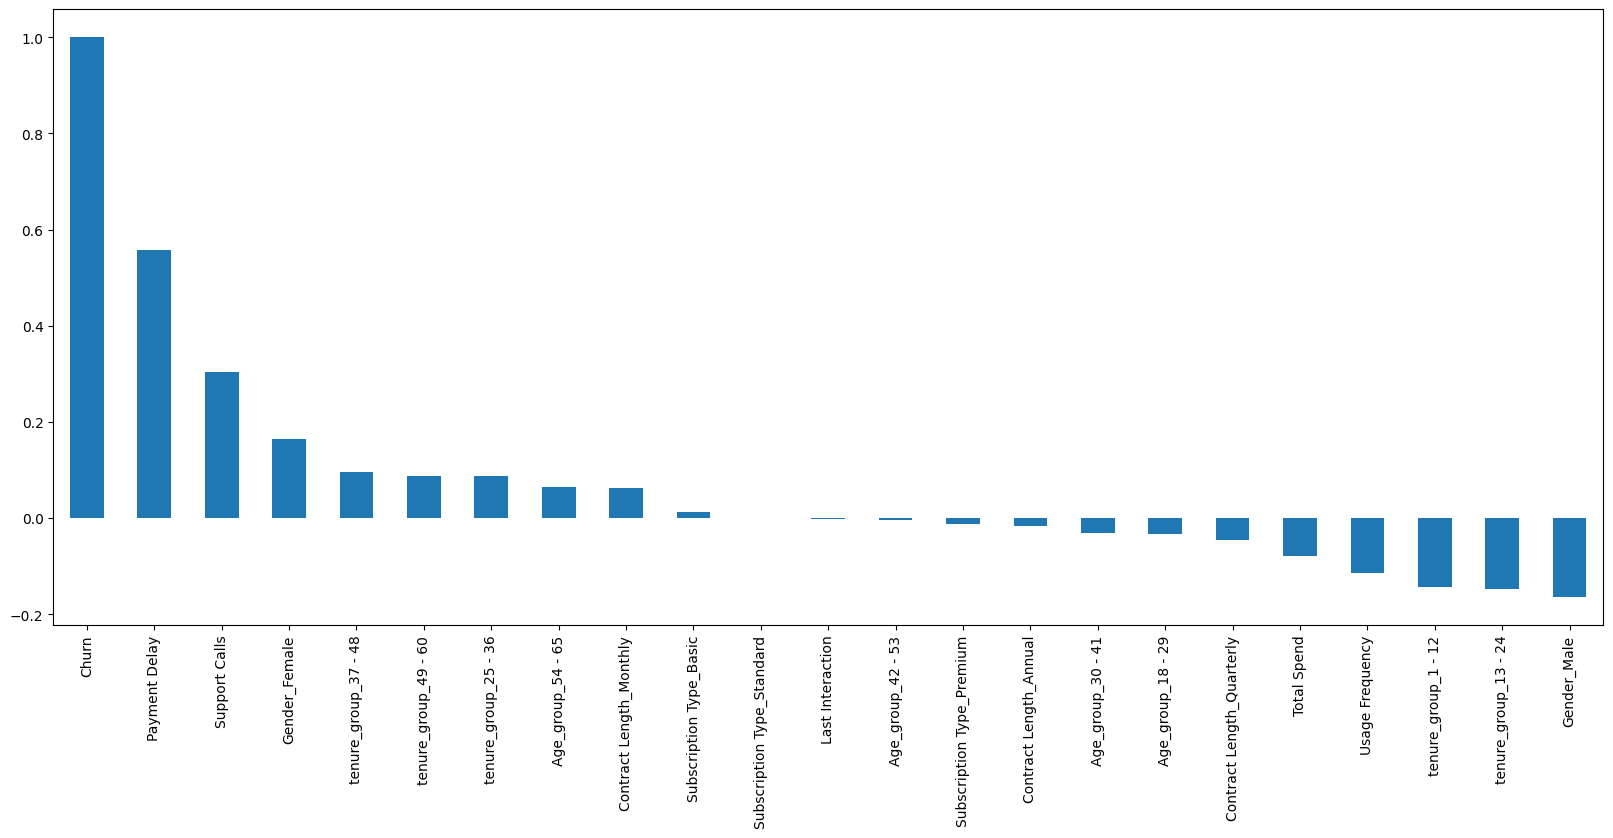

In [42]:
plt.figure(figsize=(20,8))
copy_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

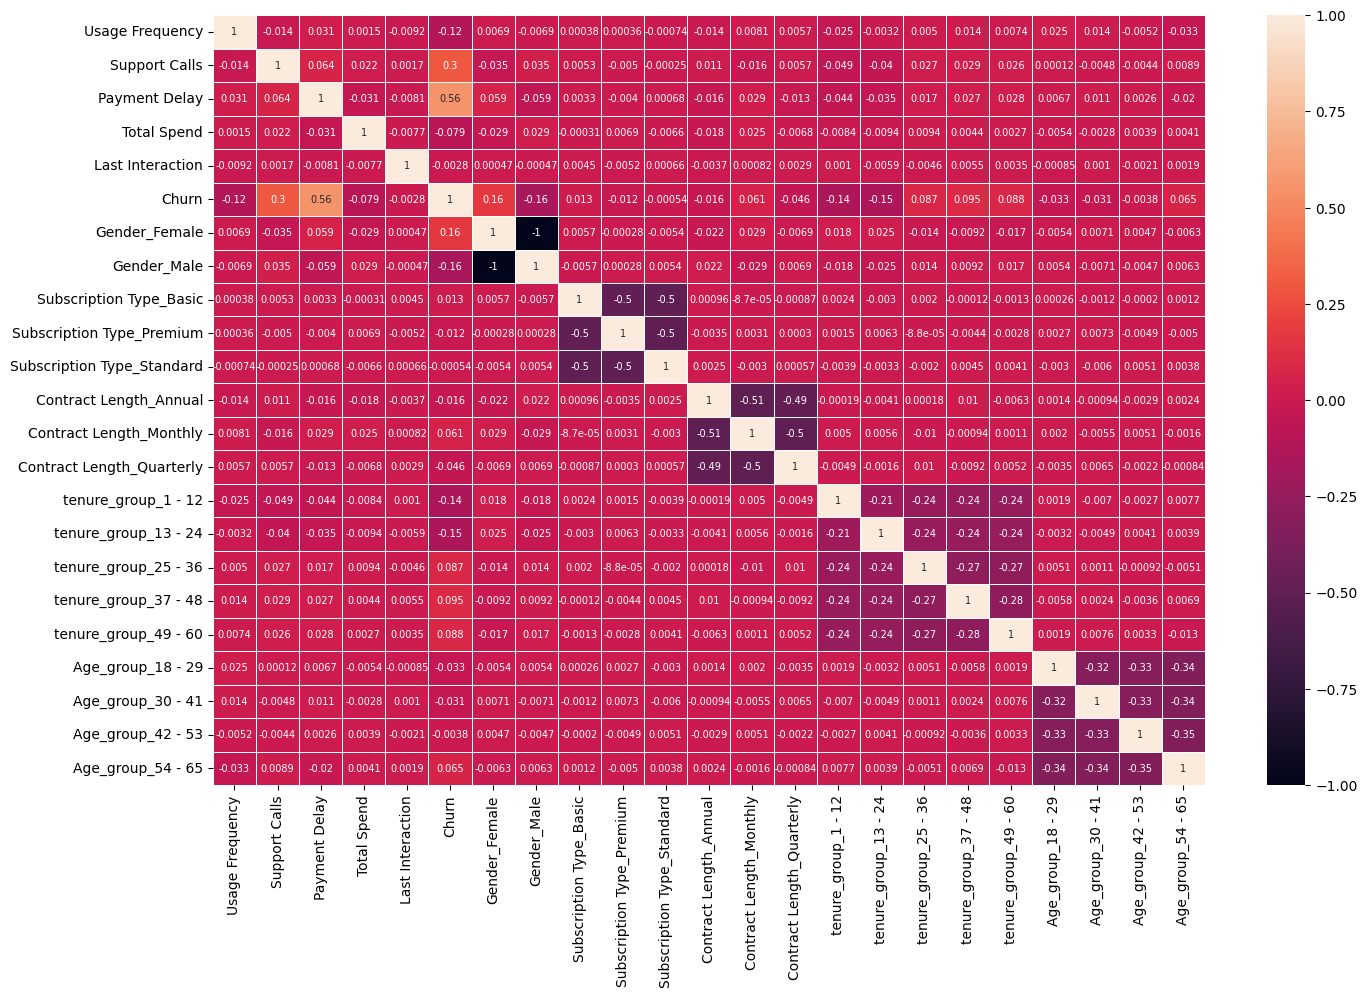

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(copy_df_dummies.corr(), annot=True, annot_kws={"size": 7}, linewidths=.5)
plt.show()